<a href="https://colab.research.google.com/github/vijay-solanky/RS-Image-Processing/blob/master/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os 
print('hello')

In [0]:
## Mount your Google Drive here
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
src_path='/content/drive/My Drive/Colab Notebooks/AOI/S2_Kharif_20181230.tif'
src_path1='/content/drive/My Drive/Colab Notebooks/AOI/NIR11.tif'

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

image = cv.imread(src_path1, cv.IMREAD_LOAD_GDAL)



import numpy as np
slice1Copy = np.uint8(image)
edges = cv.Canny(slice1Copy,100,200)



plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()




ret, thresh = cv.threshold(slice1Copy,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0


markers = cv.watershed(edges,markers)
edges[markers == -1] = [255,0,0]


cv.imshow(markers)
cv.imshow(edges)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


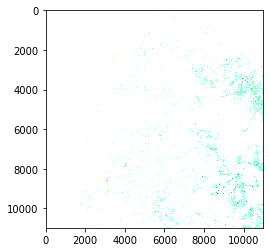

In [0]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

from osgeo import gdal

src_path='/content/drive/My Drive/Colab Notebooks/AOI/S2_Kharif_20181230.tif'
src_path1='/content/drive/My Drive/Colab Notebooks/AOI/NIR11.tif'


g_image = gdal.Open(src_path) # 3 channel rgb image
a_image = g_image.ReadAsArray()
s_image = np.dstack((a_image[0],a_image[1],a_image[2]))
plt.imshow(s_image) # show image in matplotlib (no need for color swap)
s_image = cv.cvtColor(s_image,cv.COLOR_RGB2BGR) # colorswap for cv


slice1Copy = np.uint8(a_image)
edges = cv.Canny(slice1Copy,100,200)
